# Script for data preprocessing of Materials Project datasets 

In [2]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('/home/april-ai/Desktop/UQ/MP_Data_Corrected/mp_data_100k_cleaned.csv')

In [5]:
df.head()


,Unnamed: 0,nsites,composition,formula_pretty,volume,symmetry,material_id,structure,formation_energy_per_atom,energy_above_hull,...,mean ordering parameter shell 3,max packing efficiency,structural complexity per atom,structural complexity per cell,spacegroup_num,crystal_system,crystal_system_int,is_centrosymmetric,n_symmetry_ops,dimensionality
0,99994,10,Sr1 Cr1 H1 O2,SrCrHO2,116.010397,"{'crystal_system': 'Tetragonal', 'symbol': 'P4...",mp-1218324,"{'@module': 'pymatgen.core.structure', '@class...",-2.090215,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28876,12,Sc1 I1 O1,ScIO,279.252151,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",mp-559760,"{'@module': 'pymatgen.core.structure', '@class...",-2.891759,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41418,40,Ga3 Bi5 Cl12,Ga3Bi5Cl12,1302.857133,"{'crystal_system': 'Trigonal', 'symbol': 'R3c'...",mp-569854,"{'@module': 'pymatgen.core.structure', '@class...",-1.229581,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41414,10,Ag1 N1 O3,AgNO3,125.104504,"{'crystal_system': 'Trigonal', 'symbol': 'R3c'...",mp-552185,"{'@module': 'pymatgen.core.structure', '@class...",-0.680664,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28883,24,Tl1 Cr3 O8,TlCr3O8,361.671041,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",mp-561221,"{'@module': 'pymatgen.core.structure', '@class...",-1.778230,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(len(df))

21185


In [7]:
for column in df.columns: 
    print(column)

Unnamed: 0
nsites
composition
formula_pretty
volume
symmetry
material_id
structure
formation_energy_per_atom
energy_above_hull
band_gap
H
He
Li
Be
B
C
N
O
F
Ne
Na
Mg
Al
Si
P
S
Cl
Ar
K
Ca
Sc
Ti
V
Cr
Mn
Fe
Co
Ni
Cu
Zn
Ga
Ge
As
Se
Br
Kr
Rb
Sr
Y
Zr
Nb
Mo
Tc
Ru
Rh
Pd
Ag
Cd
In
Sn
Sb
Te
I
Xe
Cs
Ba
La
Ce
Pr
Nd
Pm
Sm
Eu
Gd
Tb
Dy
Ho
Er
Tm
Yb
Lu
Hf
Ta
W
Re
Os
Ir
Pt
Au
Hg
Tl
Pb
Bi
Po
At
Rn
Fr
Ra
Ac
Th
Pa
U
Np
Pu
Am
Cm
Bk
Cf
Es
Fm
Md
No
Lr
Rf
Db
Sg
Bh
Hs
Mt
Ds
Rg
Cn
Nh
Fl
Mc
Lv
Ts
Og
transition metal fraction
0-norm
2-norm
3-norm
5-norm
7-norm
10-norm
band center
MagpieData minimum Number
MagpieData maximum Number
MagpieData range Number
MagpieData mean Number
MagpieData avg_dev Number
MagpieData mode Number
MagpieData minimum MendeleevNumber
MagpieData maximum MendeleevNumber
MagpieData range MendeleevNumber
MagpieData mean MendeleevNumber
MagpieData avg_dev MendeleevNumber
MagpieData mode MendeleevNumber
MagpieData minimum AtomicWeight
MagpieData maximum AtomicWeight
MagpieData range AtomicWeight

In [8]:
# List of element fraction columns to drop
fraction_cols = [
    "H fraction", "He fraction", "Li fraction", "Be fraction", "B fraction", "C fraction", "N fraction", "O fraction", "F fraction", "Ne fraction",
    "Na fraction", "Mg fraction", "Al fraction", "Si fraction", "P fraction", "S fraction", "Cl fraction", "Ar fraction", "K fraction", "Ca fraction",
    "Sc fraction", "Ti fraction", "V fraction", "Cr fraction", "Mn fraction", "Fe fraction", "Co fraction", "Ni fraction", "Cu fraction", "Zn fraction",
    "Ga fraction", "Ge fraction", "As fraction", "Se fraction", "Br fraction", "Kr fraction", "Rb fraction", "Sr fraction", "Y fraction", "Zr fraction",
    "Nb fraction", "Mo fraction", "Tc fraction", "Ru fraction", "Rh fraction", "Pd fraction", "Ag fraction", "Cd fraction", "In fraction", "Sn fraction",
    "Sb fraction", "Te fraction", "I fraction", "Xe fraction", "Cs fraction", "Ba fraction", "La fraction", "Ce fraction", "Pr fraction", "Nd fraction",
    "Pm fraction", "Sm fraction", "Eu fraction", "Gd fraction", "Tb fraction", "Dy fraction", "Ho fraction", "Er fraction", "Tm fraction", "Yb fraction",
    "Lu fraction", "Hf fraction", "Ta fraction", "W fraction", "Re fraction", "Os fraction", "Ir fraction", "Pt fraction", "Au fraction", "Hg fraction",
    "Tl fraction", "Pb fraction", "Bi fraction", "Po fraction", "At fraction", "Rn fraction", "Fr fraction", "Ra fraction", "Ac fraction", "Th fraction",
    "Pa fraction", "U fraction", "Np fraction", "Pu fraction", "Am fraction", "Cm fraction", "Bk fraction", "Cf fraction", "Es fraction", "Fm fraction",
    "Md fraction", "No fraction", "Lr fraction", "Rf fraction", "Db fraction", "Sg fraction", "Bh fraction", "Hs fraction", "Mt fraction", "Ds fraction",
    "Rg fraction", "Cn fraction", "Nh fraction", "Fl fraction", "Mc fraction", "Lv fraction", "Ts fraction", "Og fraction"
]

In [9]:
# Drop the columns if they exist
df_mp = df.drop(columns=fraction_cols, errors='ignore')

In [10]:
df_mp.to_csv("mp_data_100k_cleaned2.csv")

### get rid of bandgaps smaller than 0.2

In [6]:
df = df[(df['band_gap'] > 0.2)]
y = df['band_gap']


In [7]:
print(len(df))

35966


### Drop unwanted columns

In [8]:
df.drop(columns=["shear_modulus", "bulk_modulus"], inplace=True, errors='ignore')

### Drop duplicated of materials 

In [9]:
#If there are two same elements in the composition, drop one with higher energy above hull

def drop_duplicate_elements(df):
    # Group by 'composition' and keep the one with the lowest 'energy_above_hull'
    df = df.sort_values(by="energy_above_hull")
    df = df.drop_duplicates(subset=["composition"], keep='first')
    return df

df = drop_duplicate_elements(df)
df.head()

,Unnamed: 0,nsites,composition,formula_pretty,volume,symmetry,material_id,structure,formation_energy_per_atom,energy_above_hull,...,mean ordering parameter shell 3,max packing efficiency,structural complexity per atom,structural complexity per cell,spacegroup_num,crystal_system,crystal_system_int,is_centrosymmetric,n_symmetry_ops,dimensionality
99994,99994,10,Sr1 Cr1 H1 O2,SrCrHO2,116.010397,"{'crystal_system': 'Tetragonal', 'symbol': 'P4...",mp-1218324,"{'@module': 'pymatgen.core.structure', '@class...",-2.090215,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28876,28876,12,Sc1 I1 O1,ScIO,279.252151,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",mp-559760,"{'@module': 'pymatgen.core.structure', '@class...",-2.891759,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41418,41418,40,Ga3 Bi5 Cl12,Ga3Bi5Cl12,1302.857133,"{'crystal_system': 'Trigonal', 'symbol': 'R3c'...",mp-569854,"{'@module': 'pymatgen.core.structure', '@class...",-1.229581,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41414,41414,10,Ag1 N1 O3,AgNO3,125.104504,"{'crystal_system': 'Trigonal', 'symbol': 'R3c'...",mp-552185,"{'@module': 'pymatgen.core.structure', '@class...",-0.680664,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28883,28883,24,Tl1 Cr3 O8,TlCr3O8,361.671041,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",mp-561221,"{'@module': 'pymatgen.core.structure', '@class...",-1.778230,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(df)

21209

In [15]:
df.columns

Index(['Unnamed: 0', 'nsites', 'composition', 'formula_pretty', 'volume',
       'symmetry', 'material_id', 'structure', 'formation_energy_per_atom',
       'energy_above_hull',
       ...
       'mean ordering parameter shell 3', 'max packing efficiency',
       'structural complexity per atom', 'structural complexity per cell',
       'spacegroup_num', 'crystal_system', 'crystal_system_int',
       'is_centrosymmetric', 'n_symmetry_ops', 'dimensionality'],
      dtype='object', length=431)

### Drop single element materials

In [11]:
def get_rid_of_singular_elements(df):
    # Filter out rows where 'composition' contains only one element

    for element in df["composition"]:
        if isinstance(element, str) and " " in element:
            # If the composition is a string with multiple elements, keep it
            continue
        else:
            # If the composition is a single element, drop the row
            df = df[df["composition"] != element]   
    return df

df = get_rid_of_singular_elements(df)
    

In [12]:
len(df)

21185

In [14]:
#save cleaned and processed DataFrame to CSV
df.to_csv("mp_data_100k_cleaned.csv", index=False)

In [21]:
df_mp = pd.read_csv('materials_data_100k_cleaned.csv')

In [22]:
len(df_mp)

21185

In [23]:
df_mp.columns





Index(['Unnamed: 0', 'nsites', 'composition', 'formula_pretty', 'volume',
       'symmetry', 'material_id', 'structure', 'formation_energy_per_atom',
       'energy_above_hull',
       ...
       'mean ordering parameter shell 3', 'max packing efficiency',
       'structural complexity per atom', 'structural complexity per cell',
       'spacegroup_num', 'crystal_system', 'crystal_system_int',
       'is_centrosymmetric', 'n_symmetry_ops', 'dimensionality'],
      dtype='object', length=431)

In [24]:
unwanted_columns = ["builder_meta", "formula_anonymous", "property_name", "deprecated", 
                    "deprecated_reason", "last_updated", "last_updated_by", "origins", "warnings", "task_ids", "uncorrected_energy_per_atom", "is_stable", "is_metal", 
                    "equilibrum_reaction_energy_per_atom", "decomposes_to", "xas", "es_source_calc_id", "dos", "bandstructure", "dos_energy_up", "dos_energy_down",
                    "is_magnetic", "ordering", "total_magnetization", "total_magnetization_normalized_vol", "total_magnetization_normalized_formula_units", "num_magnetic_sites", 
                    "num_unique_magnetic_sites", "types_of_magnetic_species", "universal_anisotropy", "homogenous_poisson", "e_total", "e_ionic", "e_elctronic", "n", "e_ij_max", 
                    "weightded_sace_energy_EV_PER_ANG2", "weighted_surface_energy", "weighted_work_function","surface_anisotropy", "shape_factor", "has_reconstructed",
                     "possible_species", "has_props", "theoretical", "database_IDs", "fields_not_requested"]
# Remove unwanted columns
df_mp = df_mp.drop(columns=unwanted_columns, errors='ignore')

In [25]:
df_mp = df_mp.drop(columns=["deprecation_reasons","equilibrum_reaction_energy_per_atom", "deprecation_reasons", "equilibrum_reaction_energy_per_atom", "grain_boundaries", 
                            "cbm", "vbm", "efermi", "is_gap_direct", "homogenous_poisson", "e_electronic", "weighted_surface_energy_EV_PER_ANG2", "shear_modulus", "bulk_modulus"], errors='ignore')

In [26]:
df_mp.columns

Index(['Unnamed: 0', 'nsites', 'composition', 'formula_pretty', 'volume',
       'symmetry', 'material_id', 'structure', 'formation_energy_per_atom',
       'energy_above_hull',
       ...
       'mean ordering parameter shell 3', 'max packing efficiency',
       'structural complexity per atom', 'structural complexity per cell',
       'spacegroup_num', 'crystal_system', 'crystal_system_int',
       'is_centrosymmetric', 'n_symmetry_ops', 'dimensionality'],
      dtype='object', length=431)

In [79]:
df_mp["structure"][0]

"{'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0, 'lattice': {'matrix': [[3.93764022, 0.0, -0.0], [-1.96882011, 3.41009558, 0.0], [0.0, -0.0, 5.5125645500000005]], 'pbc': [True, True, True], 'a': 3.93764022, 'b': 3.9376394566130544, 'c': 5.5125645500000005, 'alpha': 90.0, 'beta': 90.0, 'gamma': 120.00000641314116, 'volume': 74.02122568300027}, 'properties': {}, 'sites': [{'species': [{'element': 'Te', 'occu': 1}], 'abc': [0.333333, 0.666667, 0.24867616], 'properties': {'magmom': 0.0}, 'label': 'Te', 'xyz': [-1.9688201100550593e-06, 2.2733981900318603, 1.370843384046128]}, {'species': [{'element': 'Te', 'occu': 1}], 'abc': [0.666667, 0.333333, 0.75132384], 'properties': {'magmom': 0.0}, 'label': 'Te', 'xyz': [1.96882207882011, 1.13669738996814, 4.141721165953872]}, {'species': [{'element': 'Rh', 'occu': 1}], 'abc': [0.0, -0.0, -0.0], 'properties': {'magmom': -0.0}, 'label': 'Rh', 'xyz': [0.0, 0.0, 0.0]}]}"

In [28]:
df_mp.head()

,Unnamed: 0,nsites,composition,formula_pretty,volume,symmetry,material_id,structure,formation_energy_per_atom,energy_above_hull,...,mean ordering parameter shell 3,max packing efficiency,structural complexity per atom,structural complexity per cell,spacegroup_num,crystal_system,crystal_system_int,is_centrosymmetric,n_symmetry_ops,dimensionality
0,99994,10,Sr1 Cr1 H1 O2,SrCrHO2,116.010397,"{'crystal_system': 'Tetragonal', 'symbol': 'P4...",mp-1218324,"{'@module': 'pymatgen.core.structure', '@class...",-2.090215,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28876,12,Sc1 I1 O1,ScIO,279.252151,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",mp-559760,"{'@module': 'pymatgen.core.structure', '@class...",-2.891759,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41418,40,Ga3 Bi5 Cl12,Ga3Bi5Cl12,1302.857133,"{'crystal_system': 'Trigonal', 'symbol': 'R3c'...",mp-569854,"{'@module': 'pymatgen.core.structure', '@class...",-1.229581,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41414,10,Ag1 N1 O3,AgNO3,125.104504,"{'crystal_system': 'Trigonal', 'symbol': 'R3c'...",mp-552185,"{'@module': 'pymatgen.core.structure', '@class...",-0.680664,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28883,24,Tl1 Cr3 O8,TlCr3O8,361.671041,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",mp-561221,"{'@module': 'pymatgen.core.structure', '@class...",-1.778230,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from matminer.featurizers.structure import (
    DensityFeatures,
    GlobalSymmetryFeatures,
    StructuralHeterogeneity,
    BondFractions,
)
from pymatgen.core import Structure


import ast

def safe_structure_from_dict(x):
    # If already a dict, use as is
    if isinstance(x, dict):
        return Structure.from_dict(x)
    # If it's a string, try to parse as dict
    if isinstance(x, str):
        try:
            d = ast.literal_eval(x)
            if isinstance(d, dict):
                return Structure.from_dict(d)
        except Exception:
            pass
    return None  # or np.nan if you want to drop these rows later

df_mp["structure"] = df_mp["structure"].apply(safe_structure_from_dict)
# Optionally, drop rows where structure could not be parsed
df_mp = df_mp[df_mp["structure"].notnull()]

for col in ["density", "vpa", "packing fraction"]:
    if col in df_mp.columns:
        df_mp = df_mp.drop(columns=[col])


# Initialize featurizers
density_feat = DensityFeatures()
symmetry_feat = GlobalSymmetryFeatures()
heterogeneity_feat = StructuralHeterogeneity()
#bond_frac_feat = BondFractions()

# Drop columns that will be created by GlobalSymmetryFeatures if they exist
#for col in ["spacegroup_num", "crystal_system", "point_group", "crystal_system_int"]:
#    if col in df_mp.columns:
#        df_mp = df_mp.drop(columns=[col])

#df_mp = symmetry_feat.featurize_dataframe(df_mp, col_id="structure")

# Drop columns that will be created by StructuralHeterogeneity if they exist
#for col in ["structural_heterogeneity"]:
#    if col in df_mp.columns:
#        df_mp = df_mp.drop(columns=[col])

#df_mp = heterogeneity_feat.featurize_dataframe(df_mp, col_id="structure", ignore_errors=True)

# Drop columns that will be created by BondFractions if they exist
#for col in bond_frac_feat.feature_labels():
 #   if col in df_mp.columns:
  #      df_mp = df_mp.drop(columns=[col])

#df_mp = bond_frac_feat.featurize_dataframe(df_mp, col_id="structure")

# Fit BondFractions to your structures
bond_frac_feat.fit(df_mp["structure"])

# Apply featurizers to the dataframe
df_mp = density_feat.featurize_dataframe(df_mp, col_id="structure", ignore_errors=True)
df_mp = symmetry_feat.featurize_dataframe(df_mp, col_id="structure", ignore_errors=True)
df_mp = heterogeneity_feat.featurize_dataframe(df_mp, col_id="structure", ignore_errors=True)
df_mp = bond_frac_feat.featurize_dataframe(df_mp, col_id="structure", ignore_errors=True)




DensityFeatures:   0%|          | 0/5804 [00:00<?, ?it/s]

GlobalSymmetryFeatures:   0%|          | 0/5804 [00:00<?, ?it/s]

StructuralHeterogeneity:   0%|          | 0/5804 [00:00<?, ?it/s]

BondFractions:   0%|          | 0/5804 [00:00<?, ?it/s]

/home/april-ai/anaconda3/lib/python3.11/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/home/april-ai/anaconda3/lib/python3.11/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/home/april-ai/anaconda3/lib/python3.11/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/home/april-ai/anaconda3/lib/python3.11/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/home/april-ai/anaco

In [71]:
df_mp.to_csv("materials_data_10k_structured.csv", index=False)

In [85]:
df_mp = pd.read_csv("materials_data_10k_structured.csv")

In [86]:
df_mp.head(20)

,nsites,composition,formula_pretty,volume,symmetry,material_id,structure,formation_energy_per_atom,energy_above_hull,band_gap,...,W - Zr bond frac.,Xe - Xe bond frac.,Y - Y bond frac.,Y - Yb bond frac.,Y - Zn bond frac.,Y - Zr bond frac.,Yb - Yb bond frac.,Zn - Zn bond frac.,Zn - Zr bond frac.,Zr - Zr bond frac.
0,3,Te2 Rh1,Te2Rh,74.021226,"{'crystal_system': 'Trigonal', 'symbol': 'P-3m...",mp-228,Full Formula (Te2 Rh1)\nReduced Formula: Te2Rh...,-0.439840,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,Zn1 As2,ZnAs2,558.344218,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-7262,Full Formula (Zn8 As16)\nReduced Formula: ZnAs...,-0.148991,0.0,0.2241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,Li1 As1,LiAs,287.389201,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-7943,Full Formula (Li8 As8)\nReduced Formula: LiAs\...,-0.588209,0.0,0.3285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,Cd1 P4,CdP4,206.572949,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-7904,Full Formula (Cd2 P8)\nReduced Formula: CdP4\n...,-0.120743,0.0,0.6551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,Na1 Sb1,NaSb,477.144588,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-7944,Full Formula (Na8 Sb8)\nReduced Formula: NaSb\...,-0.448723,0.0,0.6041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10,Ru1 F4,RuF4,126.864880,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-974434,Full Formula (Ru2 F8)\nReduced Formula: RuF4\n...,-1.884284,0.0,0.1813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,16,Li1 P1,LiP,248.527196,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-9588,Full Formula (Li8 P8)\nReduced Formula: LiP\na...,-0.616667,0.0,0.8095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20,As2 Se3,As2Se3,561.681863,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-909,Full Formula (As8 Se12)\nReduced Formula: As2S...,-0.139483,0.0,1.4466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12,Cu1 P2,CuP2,190.936932,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-927,Full Formula (Cu4 P8)\nReduced Formula: CuP2\n...,-0.156310,0.0,0.8679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,22,Sn5 O6,Sn5O6,392.793008,"{'crystal_system': 'Monoclinic', 'symbol': 'P2...",mp-978114,Full Formula (Sn10 O12)\nReduced Formula: Sn5O...,-1.762199,0.0,1.7702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
len(df_mp)

5804

In [89]:
for column in df_mp.columns: 
    print(column)

nsites
composition
formula_pretty
volume
symmetry
material_id
structure
formation_energy_per_atom
energy_above_hull
band_gap
MagpieData minimum Number
MagpieData maximum Number
MagpieData range Number
MagpieData mean Number
MagpieData avg_dev Number
MagpieData mode Number
MagpieData minimum MendeleevNumber
MagpieData maximum MendeleevNumber
MagpieData range MendeleevNumber
MagpieData mean MendeleevNumber
MagpieData avg_dev MendeleevNumber
MagpieData mode MendeleevNumber
MagpieData minimum AtomicWeight
MagpieData maximum AtomicWeight
MagpieData range AtomicWeight
MagpieData mean AtomicWeight
MagpieData avg_dev AtomicWeight
MagpieData mode AtomicWeight
MagpieData minimum MeltingT
MagpieData maximum MeltingT
MagpieData range MeltingT
MagpieData mean MeltingT
MagpieData avg_dev MeltingT
MagpieData mode MeltingT
MagpieData minimum Column
MagpieData maximum Column
MagpieData range Column
MagpieData mean Column
MagpieData avg_dev Column
MagpieData mode Column
MagpieData minimum Row
MagpieData

In [92]:
df_mp["B - Ti bond frac."]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5799    0.0
5800    0.0
5801    0.0
5802    0.0
5803    0.0
Name: B - Ti bond frac., Length: 5804, dtype: float64

In [94]:
zero_counts = (df_mp == 0).sum()
for i in zero_counts: 
    print(i)

0
0
0
0
0
0
0
0
1900
4712
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
373
0
373
0
0
0
1122
0
1122
0
0
0
57
0
57
0
0
0
30
0
27
0
213
0
4002
0
4002
143
5267
2192
2244
2192
2244
3535
3914
970
1432
970
1432
2859
5388
3050
3150
3050
3150
4663
0
0
262
0
262
0
5690
4070
4184
4070
4184
5078
5273
2192
2244
2192
2244
3535
5347
2679
2728
2679
2728
4537
5682
4277
4280
4277
4280
5225
1405
136
524
136
524
897
0
0
0
0
0
0
5602
3531
3531
3531
3531
4371
5766
4727
4727
4727
4727
5321
0
0
990
0
990
0
0
0
0
0
0
0
1336
0
158
0
0
2
0
22
0
22
135
5783
5803
5803
5803
5803
5802
5803
5803
5802
5803
5803
5803
5801
5803
5803
5801
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5803
5802
5803
5803
5803
5721
5801
5803
5801
5803
5801
5803
5803
5802
5803
5802
5801
5802
5802
5803
5803
5801
5802
5801
5799
5803
5800
5803
5802
5803
5802
5800
5802
5802
5800
5803
5803
5803
5800
5803
5797
5801
5802
5802
5802
5803
5799
5802
5802
5802
5803
5801
5802
5803
5803
5803
5803
5803
58

In [96]:
for coulmn, i in df_mp.columns, zero_counts: 
    print(coulmn, i)

ValueError: too many values to unpack (expected 2)

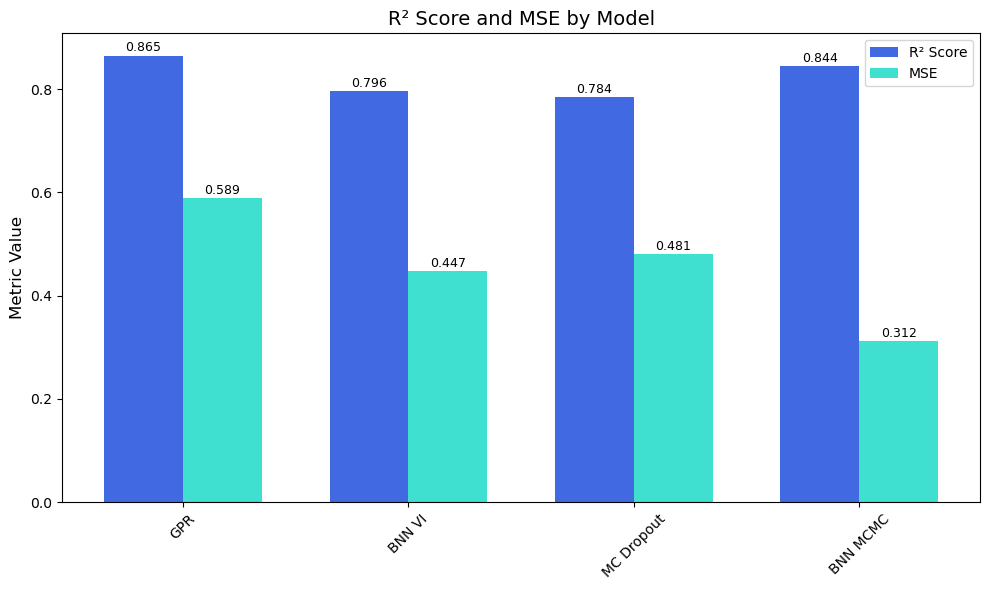

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and metric values
models = ['GPR', 'BNN VI', 'MC Dropout', 'BNN MCMC']
r2_scores = [0.8649, 0.796, 0.784, 0.844]
mse_values = [0.589, 0.447, 0.481, 0.312]

# Set up positions for the bars
x = np.arange(len(models))  # label locations
width = 0.35  # width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, r2_scores, width, label='R² Score', color='royalblue')
bars2 = ax.bar(x + width/2, mse_values, width, label='MSE', color='turquoise')

# Set chart labels and title
ax.set_ylabel('Metric Value', fontsize=12)
ax.set_title('R² Score and MSE by Model', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Add value annotations on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', fontsize=9)

# Improve layout
plt.tight_layout()
plt.show()


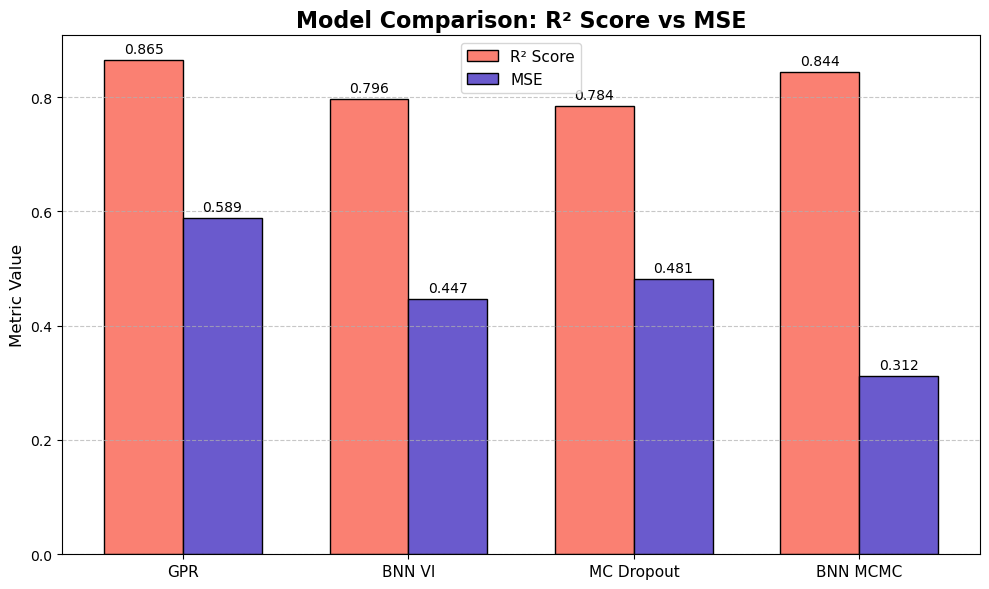

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['GPR', 'BNN VI', 'MC Dropout', 'BNN MCMC']
r2_scores = [0.8649, 0.796, 0.784, 0.844]
mse_values = [0.589, 0.447, 0.481, 0.312]
x = np.arange(len(models))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, r2_scores, width, label='R² Score', color='salmon', edgecolor='black')
bars2 = ax.bar(x + width/2, mse_values, width, label='MSE', color='SlateBlue', edgecolor='black')

# Labels and aesthetics
ax.set_title('Model Comparison: R² Score vs MSE', fontsize=16, fontweight='bold')
ax.set_ylabel('Metric Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', fontsize=10)

annotate_bars(bars1)
annotate_bars(bars2)

plt.tight_layout()
plt.show()


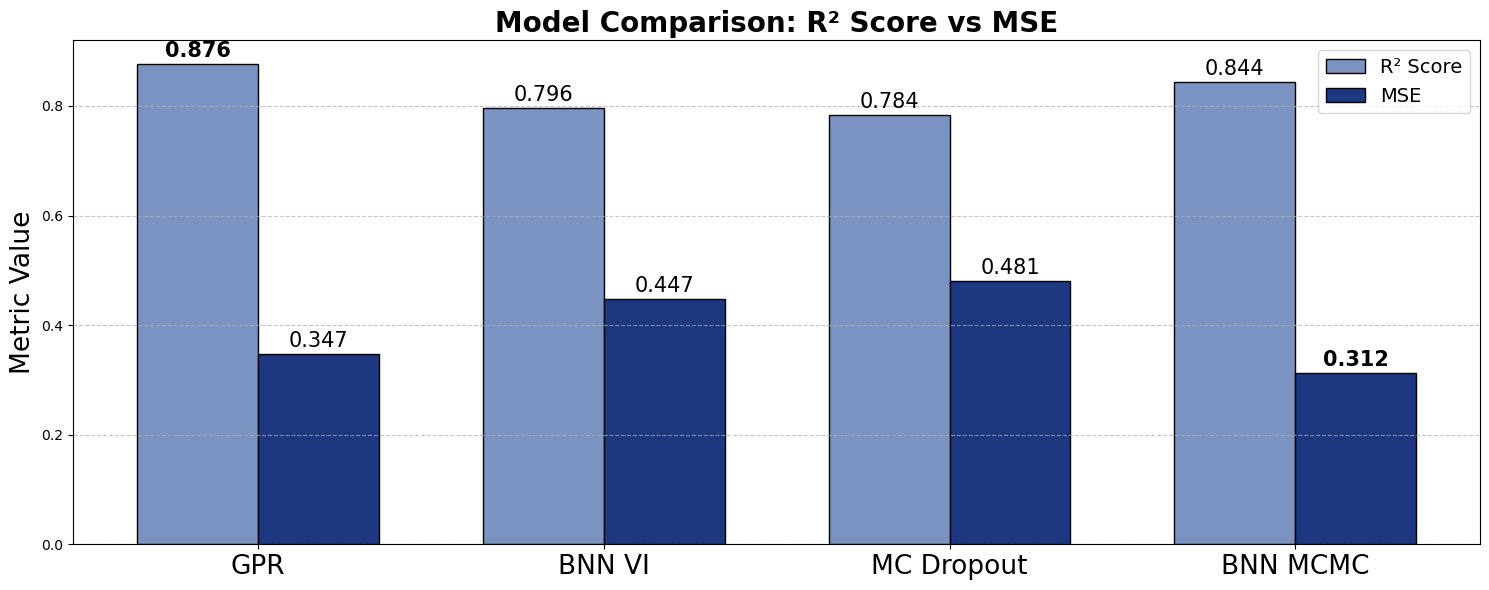

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['GPR', 'BNN VI', 'MC Dropout', 'BNN MCMC']
r2_scores = [0.876, 0.796, 0.784, 0.844]
mse_values = [0.347, 0.447, 0.481, 0.312]
x = np.arange(len(models))
width = 0.35

# Find max R² and min MSE
max_r2 = max(r2_scores)
min_mse = min(mse_values)

# Plot setup
fig, ax = plt.subplots(figsize=(15, 6))

# Bar plots
bars1 = ax.bar(x - width/2, r2_scores, width, label='R² Score', color="#7A93C0", edgecolor='black')
bars2 = ax.bar(x + width/2, mse_values, width, label='MSE', color="#1D3881", edgecolor='black')

# Labels and styling
ax.set_title('Model Comparison: R² Score vs MSE', fontsize=20, fontweight='bold')
ax.set_ylabel('Metric Value', fontsize=19)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=19)
ax.legend(fontsize=14, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with conditional bolding
def annotate_bars(bars, values, highlight_value):
    for bar, val in zip(bars, values):
        height = bar.get_height()
        font_weight = 'bold' if val == highlight_value else 'normal'
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    fontsize=15,
                    fontweight=font_weight)

annotate_bars(bars1, r2_scores, max_r2)
annotate_bars(bars2, mse_values, min_mse)

# Layout
plt.tight_layout()
plt.show()


In [1]:
rmse = 0.5890937833564989
mse = rmse ** 2
print(mse)

0.3470314855892736
